<div>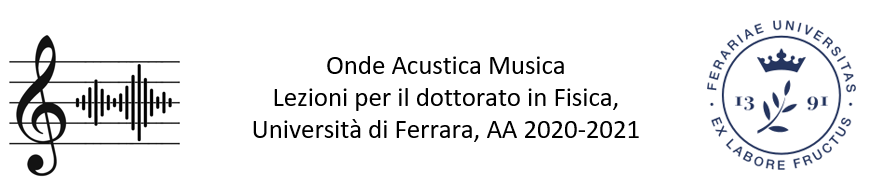</div>

# Lab 3. Beating and the Critical Band

In this lab we explore the _critical band_ by generating beatings between pure signals having frequencies $f_1$ and $f_2$, where $f_1 - f_2$ is in the order of a few Hz.

Note how beatings may also be perceived when $f_1 \simeq k f_2$ within few Hz, for $k = p/q$ and $p,q$ small integers. Which audio/amplifying devices are you using on your PC?

In [1]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
from math import log10, log
from ipywidgets import interact
import ipywidgets as widgets
import simpleaudio as sa

In [2]:
fs = 44100
def plottime(s, duration):
    # plot the time series of the signal s
    plt.subplots(figsize=(25, 5)) 
    ax = plt.subplot(1, 1, 1)
    plt.plot(np.real(s))
    plt.xlim(0)
    ax.set_xlabel('t [ms]')
    maxx = int(duration*10 + 1)*100
    ax.set_xticks(np.arange(0, maxx*fs/1000, maxx*fs/10000, dtype=int))
    ax.set_xticklabels(np.arange(0, maxx, maxx/10, dtype=int))
    plt.grid(which='major')
    plt.title("Wave packet")

In [3]:
@interact(f1=widgets.IntSlider(min=55, max=1760, value=440, continuous_update=False),
          f2=widgets.IntSlider(min=55, max=1760, value=440, continuous_update=False),
          duration=widgets.FloatSlider(min=0.01, max=6, value=1, step=0.01, continuous_update=False),
          play=widgets.Checkbox(description='play', value=True)
         )
def playwavelets(f1, f2, duration, play):
    t = np.linspace(0, duration, int(duration * fs), False)

    # generate the signal
    s = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)
    #if f1 == f2:
    #    f = np.full(int(duration * fs), f1)
    #else:
    #    #f = np.arange(f1, f2, (f2-f1) * 1.0 / int(duration * fs))    # linear chirp
    #    f = f1 * np.exp(t * log(f2/f1) / duration)    # exponential chirp, "linear perception"
    #s = np.sin(2 * np.pi * f * t)

    # apply a hanning window at the ramp up and ramp down of the signal
    w = np.hanning(s.size * 0.6)
    for i in range(int(w.size/2)):
       s[i] *= w[i]
       s[s.size-int(w.size/2)+i] *= w[int(w.size/2)+i]

    # play it
    if play:
        playable = s * (2**15 - 1) / np.max(np.abs(s))
        # stop any ongoing play
        sa.stop_all()
        # convert to 16-bit data and play
        sa.play_buffer(playable.astype(np.int16), 1, 2, fs)        
        
    plottime(s, duration)

interactive(children=(IntSlider(value=440, continuous_update=False, description='f1', max=1760, min=55), IntSl…

### Tuning and Uncertainty: some examples

We can assess the psico-acustic effects of the uncertainty by correlating the *critical band* with the shortest duration of a sound for it to be perceived with a defined pitch. The critical band for a frequency $f$ can be approximated with [1]:

$$CB = 24.7 \cdot (4.37 f / 1000 + 1)$$

For example, for a sound of 100 Hz, the critical band is about 35 Hz. Therefore, a 100 Hz sound must have a bandwidth $2\sigma_f \le$ 35 Hz in order to have a clearly distinguishable pitch (e.g. from another sound). The uncertainty suggests that the pitch nevertheless becomes undefined if the sound duration $2\sigma_t \le 2 / (4\pi \cdot \sigma_f) \simeq$ 90 ms. Higher frequency sounds have a larger critical band, therefore the duration limit would be even shorter. In practice, our hears have intrinsic limitations that enters into play at about the same levels of resolution if not lower.

Another example relates to the ability to separate two sounds when their frequencies differ for a few cents, which is the case when comparing different tunings. ...


[1] see e.g.  https://en.wikipedia.org/wiki/Critical_band